In [ ]:
# Reducing the fraction size used by the gpu
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/archive (9).zip")

patool: Extracting /content/archive (9).zip ...
patool: running /usr/bin/7z x -o./Unpack_u89yxaa6 -- "/content/archive (9).zip"
patool: ... /content/archive (9).zip extracted to `Alzheimer_s Dataset'.


'Alzheimer_s Dataset'

In [ ]:
# importing the required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Image Preprocessing

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=30,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

train_datagen: rescale = 1./255: Rescales the pixel values of the images to the range [0, 1]. This is done by dividing each pixel value by 255, which is the maximum pixel value for RGB images.
zoom_range = 0.2: Randomly zooms the images by a factor of up to 0.2. This helps to create variations in the scale of the images.
rotation_range = 30: Randomly rotates the images by an angle of up to 30 degrees. This introduces variations in the orientation of the images.
horizontal_flip = True: Randomly flips the images horizontally. This helps to create mirrored versions of the images.
vertical_flip = True: Randomly flips the images vertically. This introduces additional variations in the orientation of the images.
validation_split = 0.2: Splits the training data into a training set and a validation set. The validation set will be used for evaluating the model during training. The split is done by specifying the fraction of data to be used for validation, in this case, 20%.


valid_datagen : rescale = 1./255: Same as above, rescales the pixel values of the validation images.


test_datagen: rescale = 1./255: Same as above, rescales the pixel values of the test images.
These ImageDataGenerator objects can be used to generate batches of preprocessed images during training, validation, and testing phases of the machine learning model.

In [ ]:
# Accessing the training data
train_data  = train_datagen.flow_from_directory(directory = "/content/Alzheimer_s Dataset/train",
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 20)

Found 4098 images belonging to 4 classes.


In [ ]:
# Accessing the validation data
valid_data = valid_datagen.flow_from_directory(directory = "/content/Alzheimer_s Dataset/train",
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 20)

Found 1023 images belonging to 4 classes.


In [ ]:
# Accessing the test data
test_data  = test_datagen.flow_from_directory(directory = "/content/Alzheimer_s Dataset/test",
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 20)

Found 1279 images belonging to 4 classes.


In [ ]:
# Creating a function to display sample images from the dataset

def display(data):
  # Displaying images from the dataset
  fig, axes = plt.subplots(1, 4, figsize=(10, 2))

  # Get a batch of images and labels from the data generator
  images, labels = data.next()

  class_indices = train_data.class_indices
  class_names = list(class_indices.keys())

  for i in range(4):
      img = images[i]
      label = labels[i]
      class_index = label.argmax()

      folder_name = class_names[class_index]

      axes[i].imshow(img)
      axes[i].set_title(folder_name)
      axes[i].axis("off")

  plt.show()


* The function above display takes a data generator object as input.
* It creates a figure with 1 row and 4 columns to display 4 sample images.
* It retrieves a batch of images and labels from the data generator using the next() method.
* It retrieves the class indices and class names from the data generator.
* It iterates over the 4 sample images and their corresponding labels.
* For each image, it retrieves the corresponding label's class index.
* It retrieves the folder name (class name) associated with the class index.
* It plots the image on the corresponding subplot axis, sets the title as the folder name, and turns off the axis ticks.
* Finally, it displays the plot with the sample images.

This function is useful for visualizing a few sample images from the dataset and their associated class labels.

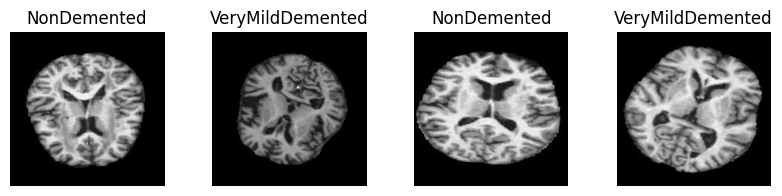

In [ ]:
# Displaying sample images from the train data
display(train_data)

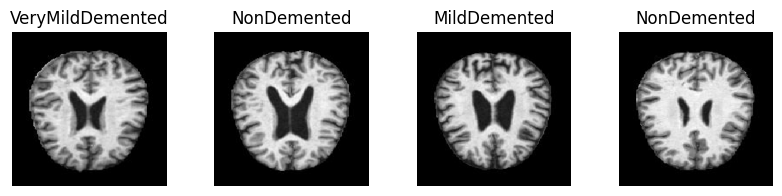

In [ ]:
# Displaying sample images from the test data
display(test_data)

# USING SUPPORT VECTOR MACHINE

SVMs are preferred for image classification tasks due to their ability to handle high-dimensional data, capture complex patterns, robustness against overfitting, adaptability, interpretability, and well-established theoretical foundation. They provide a reliable and effective approach for image classification, even with limited training samples.
Here are some reasons below:

* Effective in handling high-dimensional data: Images are often represented by high-dimensional feature vectors. SVMs can efficiently handle and classify data in high-dimensional spaces, making them suitable for image classification tasks.

* Ability to capture complex patterns: SVMs can capture complex patterns and non-linear relationships in image data by utilizing non-linear kernels such as the RBF kernel. This allows them to effectively separate different classes in the feature space.

* Robust against overfitting: SVMs are known for their ability to generalize well and avoid overfitting. They achieve this by maximizing the margin between classes, which helps in reducing the risk of overfitting and improves the model's generalization capability.

* Works well with limited training samples: In many image classification scenarios, obtaining a large labeled dataset can be challenging. SVMs can handle situations with limited training samples compared to the feature space dimensionality, making them useful when labeled data is scarce.

* Versatility and adaptability: SVMs can be applied to various types of data, including both linear and non-linear data. They can incorporate different kernel functions to capture different types of patterns and adapt to different data distributions.

In [ ]:
# using the next() to acts as an iterator
train_image, train_label = train_data.next()
train_images = train_image.reshape(train_image.shape[0], -1)

In [ ]:
# checking the shape
train_images.shape

(20, 150528)

In [ ]:
# using the next() to acts as an iterator
test_image, test_label = test_data.next()
test_images = test_image.reshape(test_image.shape[0], -1)

In [ ]:
# shape
test_images.shape

(20, 150528)

In [ ]:
train_labels = np.argmax(train_label, axis = 1)
test_labels = np.argmax(test_label, axis = 1)

In [ ]:
svm = SVC()
# pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
model = make_pipeline(svm)
param_grid = {'svc__C': [1, 5, 10, 50,100],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.5, 0.1]}
grid = GridSearchCV(model, param_grid, cv =10)

In [ ]:
grid.fit(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__C': [1, 5, 10, 50, 100],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.5,
                                        0.1]})

In [ ]:
model_svm = grid.best_estimator_

In [ ]:
y_pred = model_svm.predict(test_images)

In [ ]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)

Accuracy score: 0.7
Precision score: 0.48999999999999994
Recall score: 0.7
F1 score: 0.5764705882352941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


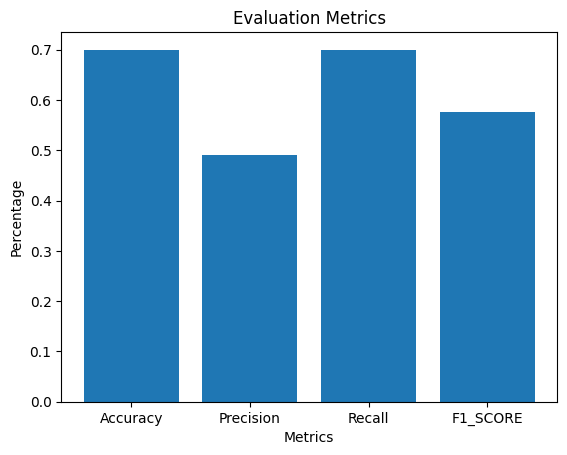

In [ ]:
# Extract the accuracy, precision, recall, and AUC values
accuracy = accuracy
precision = precision
recall = recall
f1 = f1

# Define the categories and corresponding values
categories = ['Accuracy', 'Precision', 'Recall', 'F1_SCORE']
values = [accuracy, precision, recall, f1]

# Create the bar plot
plt.bar(categories, values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')
plt.show()


## Summary of the SVM model
* Accuracy score: 0.7

The accuracy score represents the proportion of correctly classified instances out of the total number of instances. In this case, the SVM model achieved an accuracy of 0.7, indicating that 70% of the instances were correctly classified.

* Precision score: 0.49

The precision score measures the proportion of true positive predictions (correctly predicted instances) out of the total predicted positive instances. A precision score of 0.49 suggests that out of all the instances predicted as positive, only around 49% were actually true positive cases.

* Recall score: 0.7

The recall score, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of the total actual positive instances. A recall score of 0.7 indicates that the model identified 70% of the actual positive cases correctly.

* F1 score: 0.576

The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score of 0.576 indicates a reasonably balanced performance between precision and recall for the classification task.
These metrics are commonly used to evaluate the performance of a classification model. In the case of predicting Alzheimer's disease, achieving a high accuracy, precision, recall, and F1 score is desirable as it indicates a good ability to correctly classify both positive and negative instances.

In [ ]:
# model=Sequential()
# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4,activation='softmax'))

# CONVOLUTIONAL NEURAL NETWORK

### USING CNN PRETRAINED MODELS
* CNN models are trained using optimization algorithms such as stochastic gradient descent (SGD) and backpropagation to minimize a loss function. They are well-suited for image classification tasks due to their ability to learn hierarchical representations of visual patterns and their translation invariance property.

# USING TRANSFER LEARNING

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

The most common incarnation of transfer learning in the context of deep learning is the following workflow:

* Take layers from a previously trained model.

* Freeze them, so as to avoid destroying any of the information they contain during future training rounds.

* Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.

* Train the new layers on your dataset.

You can read up more from the [Tensorflow Site](https://www.tensorflow.org/guide/keras/transfer_learning).

In [ ]:
# Using transfer learning
vgg_model = VGG16(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers:
    layer.trainable=False

We have loaded the model and used 3 important parameters. input_shape=(224,224,3). That 3 represents RGB channel.

weights=’imagenet’ is important as it means that we are using the pre-trained weights of the model that the model was originally trained on using imagenet images.

include_top= False means that we will cut off the last dense layer of pre-trained model of VGG16 as it was trained for 1000 output categories of imagenet whereas we only have 3 categories. We also cut off the 1st layer because the input image and the size can be of my choice.

layer.trainable=False means we are saying that do not train the existing weights for these layers .We want to use them as it is. We have a control over the weights since it is a pre-trained model. We can control in which layer we should we pre-trained weights and in which layer we should use trainable weights.

In [ ]:
from tensorflow.keras.layers import Flatten
x = Flatten()(vgg_model.output)

In [ ]:
# putting the flattened array to the dense network
predict = Dense(4, activation = "softmax")(x)

* Dense is a type of layer in a neural network that represents a fully connected layer. It means that each neuron in this layer is connected to every neuron in the previous layer.
* 4 represents the number of neurons in the dense layer. This means that the output of this layer will be a vector of size 4.
* activation = "softmax" specifies the activation function to be used in the layer. In this case, the softmax activation function is chosen.
* x is the input to this layer, which represents the output of the previous layer or the input to the network.
Overall, the code creates a dense layer in a neural network model with 4 neurons and applies the softmax activation function to generate the final prediction output. The softmax activation function is commonly used in multi-class classification problems to obtain probability distributions over the different classes.

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs = vgg_model.input, outputs = predict)

In [ ]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# compliing the model and stating the metrics
import tensorflow as tf

metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

model.compile(loss ='categorical_crossentropy',
              metrics = metrics,
              optimizer = "adam")


In [ ]:
# Using early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

callback_list = [early_stopping]

* EarlyStopping is a callback class provided by TensorFlow or Keras that allows early stopping of the training process based on certain criteria.
monitor = 'val_auc' specifies the metric to be monitored for early stopping. In this case, it is the validation AUC.
* mode = 'max' indicates that the objective is to maximize the monitored metric. Alternatively, it can be set to 'min' if the objective is to minimize the metric.
* patience = 15 defines the number of epochs with no improvement in the monitored metric before training is stopped. If there is no improvement for patience epochs, training will be early stopped.
* verbose = 1 controls the verbosity level of the early stopping callback. A value of 1 means that messages will be printed during early stopping.
The defined early stopping callback is then stored in a list called callback_list, which can be passed as an argument to the model training process.

Overall, this code snippet sets up an early stopping callback based on the validation AUC metric, which will halt the training process if the validation AUC does not improve for a certain number of epochs.

In [ ]:
model_history=model.fit(train_data,
                        validation_data=valid_data,
                        epochs = 70,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/70
205/205 [==============================] - 66s 304ms/step - loss: 1.1967 - accuracy: 0.7668 - auc: 0.8004 - precision: 0.5386 - recall: 0.4680 - val_loss: 2.0548 - val_accuracy: 0.7502 - val_auc: 0.7774 - val_precision: 0.5005 - val_recall: 0.5005
Epoch 2/70
205/205 [==============================] - 64s 314ms/step - loss: 1.0542 - accuracy: 0.7944 - auc: 0.8382 - precision: 0.5988 - recall: 0.5378 - val_loss: 1.8870 - val_accuracy: 0.6588 - val_auc: 0.6134 - val_precision: 0.2793 - val_recall: 0.2307
Epoch 3/70
205/205 [==============================] - 63s 309ms/step - loss: 0.8917 - accuracy: 0.8116 - auc: 0.8665 - precision: 0.6410 - recall: 0.5603 - val_loss: 1.2955 - val_accuracy: 0.7529 - val_auc: 0.7769 - val_precision: 0.5068 - val_recall: 0.4360
Epoch 4/70
205/205 [==============================] - 64s 312ms/step - loss: 0.9663 - accuracy: 0.8064 - auc: 0.8601 - precision: 0.6242 - recall: 0.5671 - val_loss: 1.4580 - val_accuracy: 0.7214 - val_auc: 0.7241 - val_pre

In [ ]:
test = model.evaluate_generator(test_data)
print("Accuracy = ", test[1])
print("Precision = ", test[2])
print("Recall = ", test[3])
print("AUC = ", test[4])

<ipython-input-29-bc407d3e490c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test = model.evaluate_generator(test_data)


Accuracy =  0.8248631954193115
Precision =  0.8855749368667603
Recall =  0.6568386554718018
AUC =  0.627052366733551


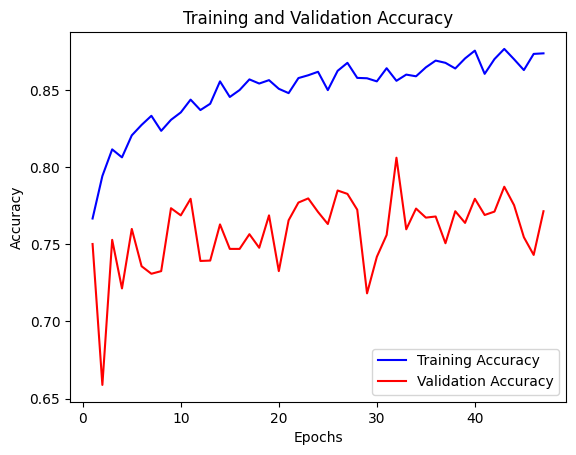

In [ ]:
import matplotlib.pyplot as plt

# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

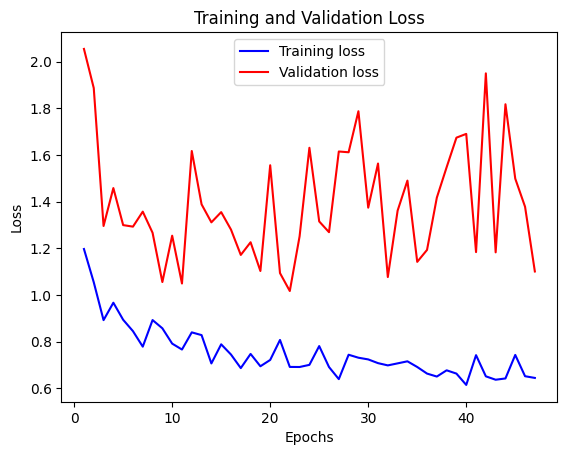

In [ ]:
# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['loss']
val_accuracy = model_history.history['val_loss']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

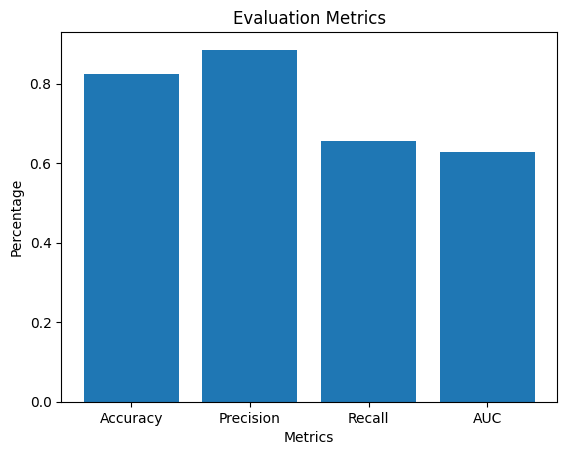

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy, precision, recall, and AUC values
accuracy = test[1]
precision = test[2]
recall = test[3]
auc = test[4]

# Define the categories and corresponding values
categories = ['Accuracy', 'Precision', 'Recall', 'AUC']
values = [accuracy, precision, recall, auc]

# Create the bar plot
plt.bar(categories, values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')
plt.show()


The accuracy of the model in predicting Alzheimer's disease using VGG16 transfer learning on a CNN is 80.4%. This means that the model correctly predicted the disease status for approximately 80.4% of the cases in the dataset.

Precision, which measures the proportion of correctly predicted positive cases out of all predicted positive cases, is 84.1%. This indicates that when the model predicts a patient to have Alzheimer's disease, it is accurate 87.96% of the time.

Recall, also known as sensitivity or true positive rate, is 62%. It represents the proportion of actual positive cases that were correctly identified by the model. In the context of Alzheimer's disease prediction, this means that the model successfully identified 62% of the patients who actually have the disease.

The AUC (Area Under the Curve) is 0.56, which is a measure of the model's ability to distinguish between positive and negative cases. A value of 0.5 indicates a random guess, while a value closer to 1 suggests a better discriminatory ability. In this case, the AUC of 0.56 indicates that the model has a moderate level of discriminative power.

Overall, these metrics suggest that the VGG16 transfer learning model on a CNN has achieved a reasonable level of accuracy in predicting Alzheimer's disease. However, there is still room for improvement, particularly in terms of recall and AUC. Fine-tuning the model, increasing the training data, or trying different architectures may help improve the performance further.

# Adding a pre-trained VGG model as a layer to the sequential model

The model architecture consists of several dense layers with batch normalization, dropout layers for regularization, and activation functions to introduce non-linearity. The final output layer uses the softmax activation function for multi-class classification.

Summary of the model architecture

* model=Sequential(): Initializes a sequential model, which allows us to stack layers sequentially.

* model.add(vgg_model): Adds a pre-trained VGG model as a layer to the sequential model. This layer acts as a feature extractor, capturing meaningful representations from the input data.

* model.add(Dropout(0.5)): Adds a dropout layer with a dropout rate of 0.5. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training, helping to prevent overfitting.

* model.add(Flatten()): Adds a flatten layer, which flattens the multidimensional output from the previous layer into a 1D vector, preparing it for the fully connected layers.

* model.add(BatchNormalization()): Adds a batch normalization layer. Batch normalization normalizes the activations of the previous layer, improving the stability and speed of training.

* model.add(Dense(2048,kernel_initializer='he_uniform')): Adds a dense (fully connected) layer with 2048 neurons. The 'he_uniform' kernel initializer initializes the weights of the layer using a uniform distribution to help with better learning.

* model.add(BatchNormalization()): Adds another batch normalization layer.

* model.add(Activation('relu')): Adds a ReLU activation layer, which introduces non-linearity to the model.

* model.add(Dropout(0.5)): Adds another dropout layer with a dropout rate of 0.5.

* model.add(Dense(1024,kernel_initializer='he_uniform')): Adds another dense layer with 1024 neurons.

* model.add(BatchNormalization()): Adds another batch normalization layer.

* model.add(Activation('relu')): Adds another ReLU activation layer.

* model.add(Dropout(0.5)): Adds another dropout layer with a dropout rate of 0.5.

* model.add(Dense(4,activation='softmax')): Adds the final dense layer with 4 neurons and a softmax activation function. This layer produces the output probabilities for the 4 classes, representing the predicted probabilities of each class.

In [ ]:
model=Sequential()
model.add(vgg_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (BatchN  (None, 25088)            100352    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                        

In [ ]:
# compliing the model and stating the metrics
import tensorflow as tf

metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

model.compile(loss ='categorical_crossentropy',
              metrics = metrics,
              optimizer = "adam")


In [ ]:
# Using early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

callback_list = [early_stopping]

In [ ]:
model_history=model.fit(train_data,
                        validation_data=valid_data,
                        epochs = 70,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/70
205/205 [==============================] - 81s 320ms/step - loss: 1.3776 - accuracy: 0.7544 - auc: 0.7734 - precision: 0.5099 - recall: 0.4505 - val_loss: 1.2176 - val_accuracy: 0.7217 - val_auc: 0.6996 - val_precision: 0.3964 - val_recall: 0.2170
Epoch 2/70
205/205 [==============================] - 62s 301ms/step - loss: 1.0476 - accuracy: 0.7819 - auc: 0.8229 - precision: 0.5773 - recall: 0.4768 - val_loss: 1.2556 - val_accuracy: 0.7439 - val_auc: 0.7823 - val_precision: 0.4863 - val_recall: 0.4350
Epoch 3/70
205/205 [==============================] - 62s 302ms/step - loss: 0.9771 - accuracy: 0.7884 - auc: 0.8354 - precision: 0.5956 - recall: 0.4780 - val_loss: 1.1045 - val_accuracy: 0.7603 - val_auc: 0.7827 - val_precision: 0.5295 - val_recall: 0.3685
Epoch 4/70
205/205 [==============================] - 62s 302ms/step - loss: 0.9617 - accuracy: 0.7911 - auc: 0.8349 - precision: 0.6066 - recall: 0.4680 - val_loss: 1.1761 - val_accuracy: 0.7639 - val_auc: 0.7407 - val_pre

In [ ]:
test = model.evaluate_generator(test_data)
print("Accuracy = ", test[1])
print("Precision = ", test[2])
print("Recall = ", test[3])
print("AUC = ", test[4])

<ipython-input-17-bc407d3e490c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test = model.evaluate_generator(test_data)


Accuracy =  0.8440187573432922
Precision =  0.9031142592430115
Recall =  0.7089487314224243
AUC =  0.6379984617233276


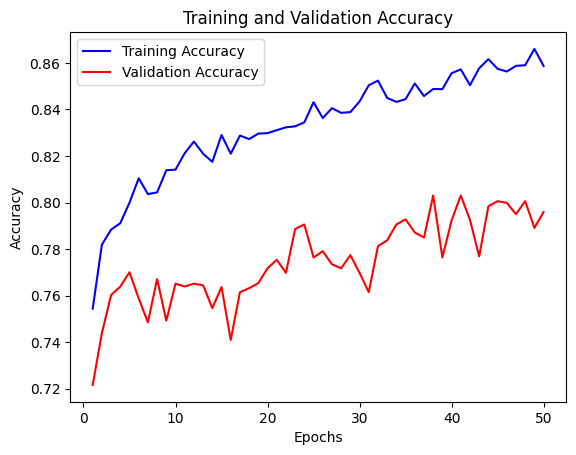

In [ ]:
import matplotlib.pyplot as plt

# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

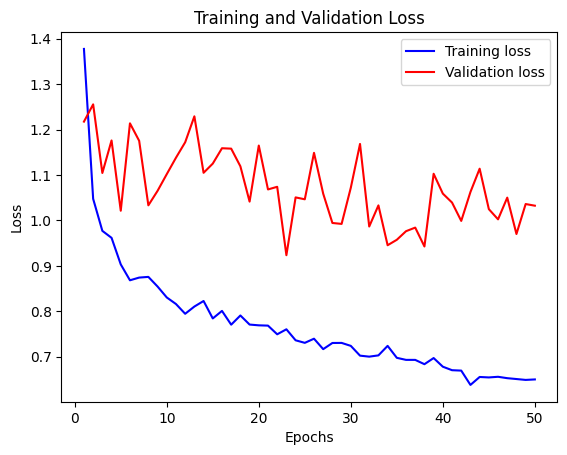

In [ ]:
# Get the training accuracy and validation accuracy from the model history
train_accuracy = model_history.history['loss']
val_accuracy = model_history.history['val_loss']

# Plot the training accuracy and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

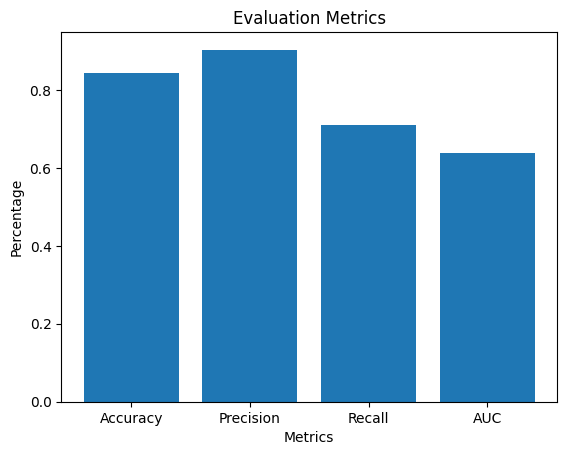

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy, precision, recall, and AUC values
accuracy = test[1]
precision = test[2]
recall = test[3]
auc = test[4]

# Define the categories and corresponding values
categories = ['Accuracy', 'Precision', 'Recall', 'AUC']
values = [accuracy, precision, recall, auc]

# Create the bar plot
plt.bar(categories, values)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')
plt.show()


* Accuracy: 0.8440187573432922

Accuracy measures the overall correctness of the model's predictions. It is calculated as the ratio of correctly predicted samples to the total number of samples. An accuracy of 0.844 indicates that the model's predictions match the true labels for approximately 84.4% of the samples.

* Precision: 0.9031142592430115

Precision is the measure of how well the model predicts positive samples correctly. It is calculated as the ratio of true positives to the sum of true positives and false positives. A precision of 0.903 indicates that out of all the samples the model predicted as positive, approximately 90.3% of them are truly positive.

* Recall: 0.7089487314224243

Recall, also known as sensitivity or true positive rate, measures the model's ability to identify positive samples correctly. It is calculated as the ratio of true positives to the sum of true positives and false negatives. A recall of 0.709 indicates that the model correctly identified approximately 70.9% of the positive samples.

* AUC: 0.6379984617233276

AUC (Area Under the Curve) represents the performance of the model across all possible classification thresholds. It measures the ability of the model to distinguish between positive and negative samples. An AUC of 0.638 suggests that the model has a moderate level of discriminatory power.

These metrics provide an evaluation of the model's performance on the given dataset. An accuracy of 0.844 indicates that the model is relatively accurate in predicting the classes. However, it is important to consider the precision, recall, and AUC as well, as they provide more insights into the model's performance, especially in cases of imbalanced datasets or when specific class predictions are of greater importance.

# USING FASTAI
Fastai was founded in 2016 by Jeremy Howard and Rachel Thomaswith the goal of democratizing deep learning. They do this by providing a massive open online course (MOOC) named “Practical Deep Learning for Coders,” which has no other prerequisites except for knowledge of the programming language Python. You can read more on the documentation [fastai]("https://docs.fast.ai/tutorial.vision.html")

In [ ]:
# Importing the library
from fastai.vision.all import *

In [ ]:
# setting the path and size
path = "/content/Alzheimer_s Dataset/train"
size = 224
bs = 64

In [ ]:
train_data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(),
                 get_y = parent_label,
                 item_tfms = Resize(224),
                 batch_tfms = aug_transforms())

In [ ]:
train = train_data.dataloaders(path, bs = 64)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

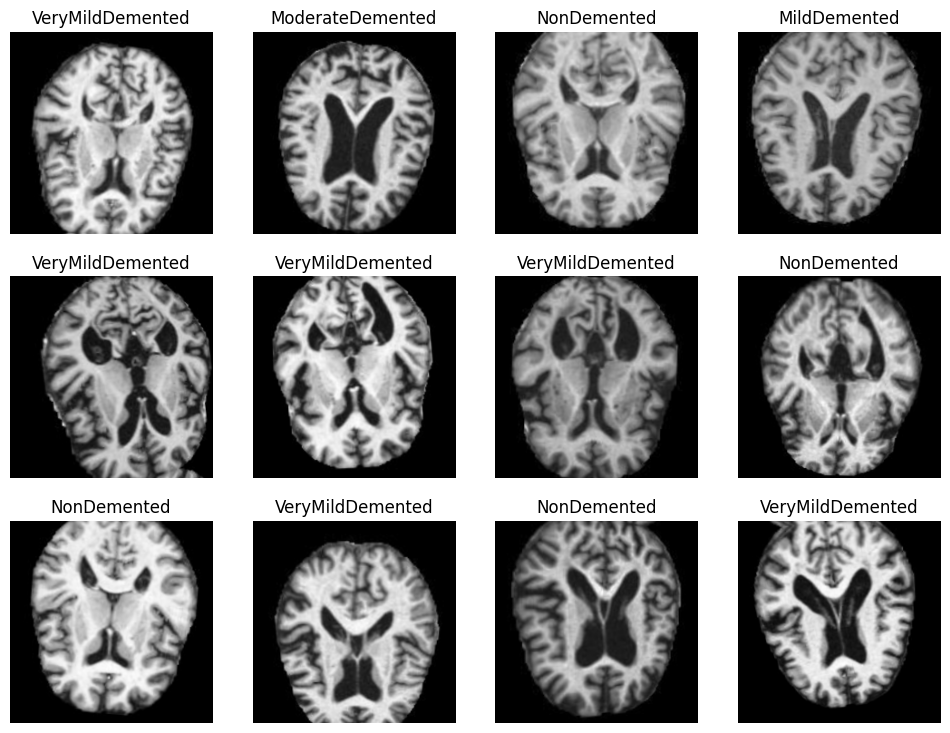

In [ ]:
train.show_batch(max_n = 12, nrows = 3)
train.vocab

In [ ]:
learn = cnn_learner(train, resnet50, metrics = accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.921958,1.272635,0.583008,00:34


epoch,train_loss,valid_loss,accuracy,time
0,1.319383,0.941568,0.625977,00:46
1,1.153242,0.777528,0.683594,00:47
2,0.935297,0.643095,0.738281,00:46
3,0.730174,0.537829,0.794922,00:47
4,0.592089,0.506480,0.794922,00:47
5,0.444753,0.465772,0.818359,00:47
6,0.352518,0.469392,0.823242,00:47
7,0.248864,0.268385,0.907227,00:47
8,0.179607,0.302860,0.889648,00:46
9,0.153475,0.281893,0.898438,00:47


What is Resnet34? Resnet34 is an image classification model. It is a CNN (Convolutional Neural Network) structured as 34 layers (hence its name). Resnet34 is pre-trained on the ImageNet dataset, which contains more than 100,000 images across 200 classes. A CNN is usually used for image classification purposes.

In [ ]:
# predict the model on test image
learn.predict("/content/Alzheimer_s Dataset/test/NonDemented/26 (65).jpg")

('NonDemented',
 tensor(2),
 tensor([1.7627e-03, 3.5422e-04, 9.9169e-01, 6.1920e-03]))

In [1]:
def m2tex(model):
    stringlist = []
    model.summary(line_length=70, print_fn=lambda x: stringlist.append(x))
    del stringlist[1:-4:2]
    del stringlist[-1]
    for ix in range(1,len(stringlist)-3):
        tmp = stringlist[ix]
        stringlist[ix] = tmp[0:31]+"& "+tmp[31:59]+"& "+tmp[59:]+"\\\\ \hline"
    stringlist[0] = "Model: test \\\\ \hline"
    stringlist[1] = stringlist[1]+" \hline"
    stringlist[-4] = stringlist[-4]+" \hline"
    stringlist[-3] = stringlist[-3]+" \\\\"
    stringlist[-2] = stringlist[-2]+" \\\\"
    stringlist[-1] = stringlist[-1]+" \\\\ \hline"
    prefix = ["\\begin{table}[]", "\\begin{tabular}{lll}"]
    suffix = ["\end{tabular}", "\caption{Model summary for test.}", "\label{tab:model-summary}" , "\end{table}"]
    stringlist = prefix + stringlist + suffix
    out_str = " \n".join(stringlist)
    out_str = out_str.replace("_", "\_")
    out_str = out_str.replace("#", "\#")
    print(out_str)

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Using transfer learning
vgg_model = VGG16(input_shape=(224,224,3),
                   include_top=False,
                   weights="imagenet")

58889256/58889256 [==============================] - 4s 0us/step


In [6]:
model=Sequential()
model.add(vgg_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (BatchN  (None, 25088)            100352    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [9]:
 m2tex(model)

\begin{table}[] 
\begin{tabular}{lll} 
Model: test \\ \hline 
 Layer (type)                  & Output Shape                & Param \#    \\ \hline \hline 
 vgg16 (Functional)            & (None, 7, 7, 512)           & 14714688   \\ \hline 
 dropout (Dropout)             & (None, 7, 7, 512)           & 0          \\ \hline 
 flatten (Flatten)             & (None, 25088)               & 0          \\ \hline 
 batch\_normalization (BatchNor &  (None, 25088)              & 100352     \\ \hline 
                               &                             &            \\ \hline 
                               &                             &            \\ \hline 
 ormalization)                 &                             &            \\ \hline 
 activation (Activation)       & (None, 2048)                & 0          \\ \hline 
 dropout\_1 (Dropout)           & (None, 2048)                & 0          \\ \hline 
 dense\_1 (Dense)               & (None, 1024)                & 2098176    \\ 